In [84]:
"""
Import all the required libraries.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import pydot
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import sys

"""
The Graph Class
"""

class Graph:
    def __init__(self):
        # Dictionary containing keys that map to the corresponding vertex
        # object.
        self.vertices = {}
        
    def addVertex(self, key):
        # Add a vertex with the given key to the graph.
        vertex = Vertex(key)
        self.vertices[key] = vertex
        
    def getVertex(self, key):
        # Return vertex object with the corresponding key.
        return self.vertices[key]
    
    def __contains__(self, key):
        return key in self.vertices
    
    def addEdge(self, src_key, dest_key, weight=1):
        # Add edge from src_key to dest_key with given weight.
        self.vertices[src_key].addNeighbor(self.vertices[dest_key], weight)
        
    def doesEdgeExist(self, src_key, dest_key):
        # Return True if there is an edge from the given source and destination
        # key pair.
        return self.vertices[src_key].doesPointTo(self.vertices[dest_key])
    
    def __iter__(self):
        return iter(self.vertices.values())

"""
The Vertex Class
"""

class Vertex:
    def __init__(self, key):
        self.key = key
        self.points_to = {}
        self.gene_copy_number = np.zeros(8)
    
    # def __init__(self):
    #     self.gene_copy_number = np.zeros(8)
        
    def getKey(self):
        # Return the key corresponding to this vertex object.
        return self.key
    
    def addNeighbor(self, dest, weight):
        # Make this vertex point to dest with given edge weight.
        self.points_to[dest] = weight
        
    def getNeighbors(self):
        # Return all vertices pointed to by this vertex.
        return self.points_to.keys()
    
    def getWeight(self, dest):
        # Get weight of edge from this vertex to dest.
        return self.points_to[dest]
    
    def doesPointTo(self, dest):
        # Return True if this vertex points to dest.
        return dest in self.points_to

    def addGeneCopyNumber(self, gcn):
        self.gene_copy_number = gcn

    def getGeneCopyNumber(self):
        return self.gene_copy_number

"""
The Queue Class
"""

class Queue:
    def __init__(self):
        self.items = []
        
    def isEmpty(self):
        return self.items == []
    
    def enqueue(self, data):
        self.items.append(data)
        
    def dequeue(self):
        return self.items.pop(0)

data = np.loadtxt("test.txt")

# v = Vertex(1)
# v.addGeneCopyNumber(data[0][3:-1])
# print(v.getGeneCopyNumber())
# print(v.getKey())

g = Graph()

num_vertices = len(data)

for idx in range(num_vertices):
    # print(row)
    g.addVertex(idx)
    vertex = g.getVertex(idx)
    vertex.addGeneCopyNumber(data[idx][4:-1].astype(int))

for i in range(num_vertices):
    vertex = g.getVertex(i)
#     print(vertex.getGeneCopyNumber())

copy_number_array = np.empty([num_vertices,7]).astype(int)

for i in range(num_vertices):
    vertex = g.getVertex(i)
    copy_number_array[i] = vertex.getGeneCopyNumber().astype(int)

manhattan_distance_matrix = np.empty([num_vertices, num_vertices]).astype(int)

for i in range(num_vertices):
    for j in range(num_vertices):
        manhattan_distance_matrix[i][j] = sum(abs(np.subtract(copy_number_array[i],
        copy_number_array[j]))).astype(int)

copy_number_df = pd.DataFrame(copy_number_array, index = range(num_vertices))
manhattan_df = pd.DataFrame(manhattan_distance_matrix, index = range(num_vertices),
                           columns = range(num_vertices))
display(copy_number_df)
display(manhattan_df)

,0,1,2,3,4,5,6
0,2,2,2,2,2,2,2
1,0,2,2,0,0,2,2
2,1,2,1,2,2,2,2
3,1,2,2,1,2,2,2
4,1,2,2,2,2,2,2
5,1,2,2,3,2,2,3
6,2,2,0,0,2,2,2
7,2,2,1,2,2,2,2
8,2,2,2,0,2,2,2
9,2,2,2,1,2,2,2


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0,6,2,2,1,3,4,1,2,1,...,5,7,12,16,7,13,11,19,7,10
1,6,0,6,4,5,7,6,7,4,5,...,11,13,18,22,11,19,17,25,13,16
2,2,6,0,2,1,3,4,1,4,3,...,7,9,14,18,7,15,13,21,9,12
3,2,4,2,0,1,3,4,3,2,1,...,7,9,14,18,7,15,13,21,9,12
4,1,5,1,1,0,2,5,2,3,2,...,6,8,13,17,6,14,12,20,8,11
5,3,7,3,3,2,0,7,4,5,4,...,4,6,11,15,6,14,10,18,6,9
6,4,6,4,4,5,7,0,3,2,3,...,9,11,16,20,11,17,15,23,11,14
7,1,7,1,3,2,4,3,0,3,2,...,6,8,13,17,8,14,12,20,8,11
8,2,4,4,2,3,5,2,3,0,1,...,7,9,14,18,9,15,13,21,9,12
9,1,5,3,1,2,4,3,2,1,0,...,6,8,13,17,8,14,12,20,8,11


In [85]:
def locateMin(a):
    smallest = min(a)
    return smallest, [index for index, element in enumerate(a) if smallest == element]

def without(iterable, remove_indices):
    """
    Returns an iterable for a collection or iterable, which returns all items except the
    specified indices.
    """
    if not hasattr(remove_indices, '__iter__'):
        remove_indices = {remove_indices}
    else:
        remove_indices = set(remove_indices)
    for k, item in enumerate(iterable):
        if k in remove_indices:
            continue
        yield item

def graphGenerator(DG, vertex_idx):
    visited = set()
    q = Queue()
    q.enqueue(vertex_idx)
    visited.add(vertex_idx)
    traversed.append(vertex_idx)
    
    while not q.isEmpty():
        current = q.dequeue()
            
        for leaf in list(without(range(num_vertices),visited)):
            if leaf != 0 and sum(copy_number_array[current,:]
                                 ==copy_number_array[leaf,:]) > 5:
                DG.add_weighted_edges_from([(current, leaf,
                                             manhattan_distance_matrix[current,leaf])])
                visited.add(leaf)
                q.enqueue(leaf)
                traversed.append(leaf)

DG =nx.DiGraph()
DG.add_nodes_from(range(num_vertices))
ROOT = 0
traversed = []
THRESHOLD = num_vertices

graphGenerator(DG, ROOT)
 
for i in range(ROOT+1, num_vertices):
    graphGenerator(DG, i)
    
for i in range(num_vertices):
    if DG.degree[i] == 0:
        for j in range(num_vertices):
            DG.add_weighted_edges_from([(i,j,manhattan_distance_matrix[j,i])])
            DG.add_weighted_edges_from([(j,i,manhattan_distance_matrix[j,i])])

node_dict = {}

pos = graphviz_layout(DG, prog='dot')
for i in range(num_vertices):
    label_firstline = ''.join(str(f) for f in copy_number_array[i,:4])
    label_secondline = ''.join(str(s) for s in copy_number_array[i,4:])
    node_dict[i] = label_firstline+'\n'+label_secondline
    
# print(node_dict)

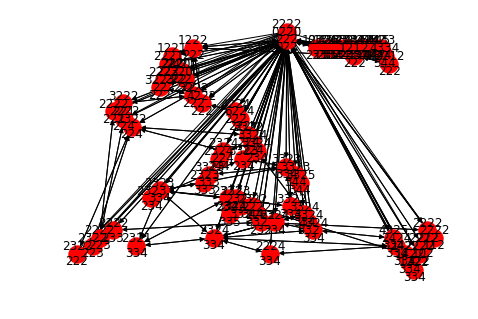

In [86]:
nx.draw(DG, pos, labels=node_dict, arrows=True)
plt.show()

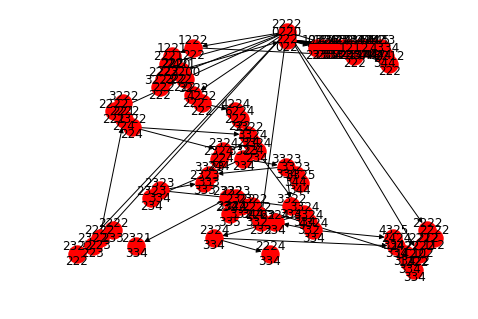

In [87]:
branching = nx.tree.minimum_spanning_arborescence(DG, attr="weight")
pos_branching = graphviz_layout(branching, prog='dot')
nx.draw(branching, pos, labels=node_dict, arrows=True)
H = nx.relabel_nodes(branching, node_dict, copy=False)
write_dot(branching,'test.dot')
!dot -T png test.dot > test.png
plt.savefig('MinArb.png')